# **VEGFR KINASE VIRTUAL DRUG SCREENING**

# Transform SMILES menjadi LIST

In [ ]:
df_eda = pd.read_csv('01_label_sars.csv')
df_eda

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1336,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,2600.00,intermediate
1,CHEMBL2332840,O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1ccc(Cl)c(C...,2250.00,intermediate
2,CHEMBL2332871,O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1ccc(C(F)(F...,8460.00,intermediate
3,CHEMBL2332870,O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1cc(C(F)(F)...,5180.00,intermediate
4,CHEMBL2332869,O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1cccc(OC(F)...,17760.00,inactive
...,...,...,...,...
899,CHEMBL409872,Nc1ncnc2c1N=C(c1ccc(NC(=O)Nc3cccc(Cl)c3)cc1)CCN2,50.00,active
900,CHEMBL259013,Nc1ncnc2c1N=C(c1ccc(NC(=O)Nc3ccc(C(F)(F)F)cc3)...,2440.00,intermediate
901,CHEMBL261592,Cc1cc2cc(Nc3ncnn4cc(-c5nnc(C)o5)c(C(C)C)c34)cn...,53.00,active
902,CHEMBL3545376,COc1cc(OC)cc(N(CCNC(C)C)c2ccc3ncc(-c4cnn(C)c4)...,0.10,active


In [ ]:
df_eda = df_label
df_eda

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1336,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,2600.00,intermediate
1,CHEMBL2332840,O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1ccc(Cl)c(C...,2250.00,intermediate
2,CHEMBL2332871,O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1ccc(C(F)(F...,8460.00,intermediate
3,CHEMBL2332870,O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1cc(C(F)(F)...,5180.00,intermediate
4,CHEMBL2332869,O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1cccc(OC(F)...,17760.00,inactive
...,...,...,...,...
899,CHEMBL409872,Nc1ncnc2c1N=C(c1ccc(NC(=O)Nc3cccc(Cl)c3)cc1)CCN2,50.00,active
900,CHEMBL259013,Nc1ncnc2c1N=C(c1ccc(NC(=O)Nc3ccc(C(F)(F)F)cc3)...,2440.00,intermediate
901,CHEMBL261592,Cc1cc2cc(Nc3ncnn4cc(-c5nnc(C)o5)c(C(C)C)c34)cn...,53.00,active
902,CHEMBL3545376,COc1cc(OC)cc(N(CCNC(C)C)c2ccc3ncc(-c4cnn(C)c4)...,0.10,active


In [ ]:
df_no_smiles = df_eda.drop(columns='canonical_smiles')
df_no_smiles

,molecule_chembl_id,standard_value,class
0,CHEMBL1336,2600.00,intermediate
1,CHEMBL2332840,2250.00,intermediate
2,CHEMBL2332871,8460.00,intermediate
3,CHEMBL2332870,5180.00,intermediate
4,CHEMBL2332869,17760.00,inactive
...,...,...,...
899,CHEMBL409872,50.00,active
900,CHEMBL259013,2440.00,intermediate
901,CHEMBL261592,53.00,active
902,CHEMBL3545376,0.10,active


In [ ]:
smiles = []

for i in df_eda.canonical_smiles.tolist():
    cpd = str(i).split('.')
    cpd_longest = max(cpd, key = len)
    smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL1336,2600.00,intermediate,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...
1,CHEMBL2332840,2250.00,intermediate,O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1ccc(Cl)c(C...
2,CHEMBL2332871,8460.00,intermediate,O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1ccc(C(F)(F...
3,CHEMBL2332870,5180.00,intermediate,O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1cc(C(F)(F)...
4,CHEMBL2332869,17760.00,inactive,O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1cccc(OC(F)...
...,...,...,...,...
899,CHEMBL409872,50.00,active,Nc1ncnc2c1N=C(c1ccc(NC(=O)Nc3cccc(Cl)c3)cc1)CCN2
900,CHEMBL259013,2440.00,intermediate,Nc1ncnc2c1N=C(c1ccc(NC(=O)Nc3ccc(C(F)(F)F)cc3)...
901,CHEMBL261592,53.00,active,Cc1cc2cc(Nc3ncnn4cc(-c5nnc(C)o5)c(C(C)C)c34)cn...
902,CHEMBL3545376,0.10,active,COc1cc(OC)cc(N(CCNC(C)C)c2ccc3ncc(-c4cnn(C)c4)...


<Axes: >

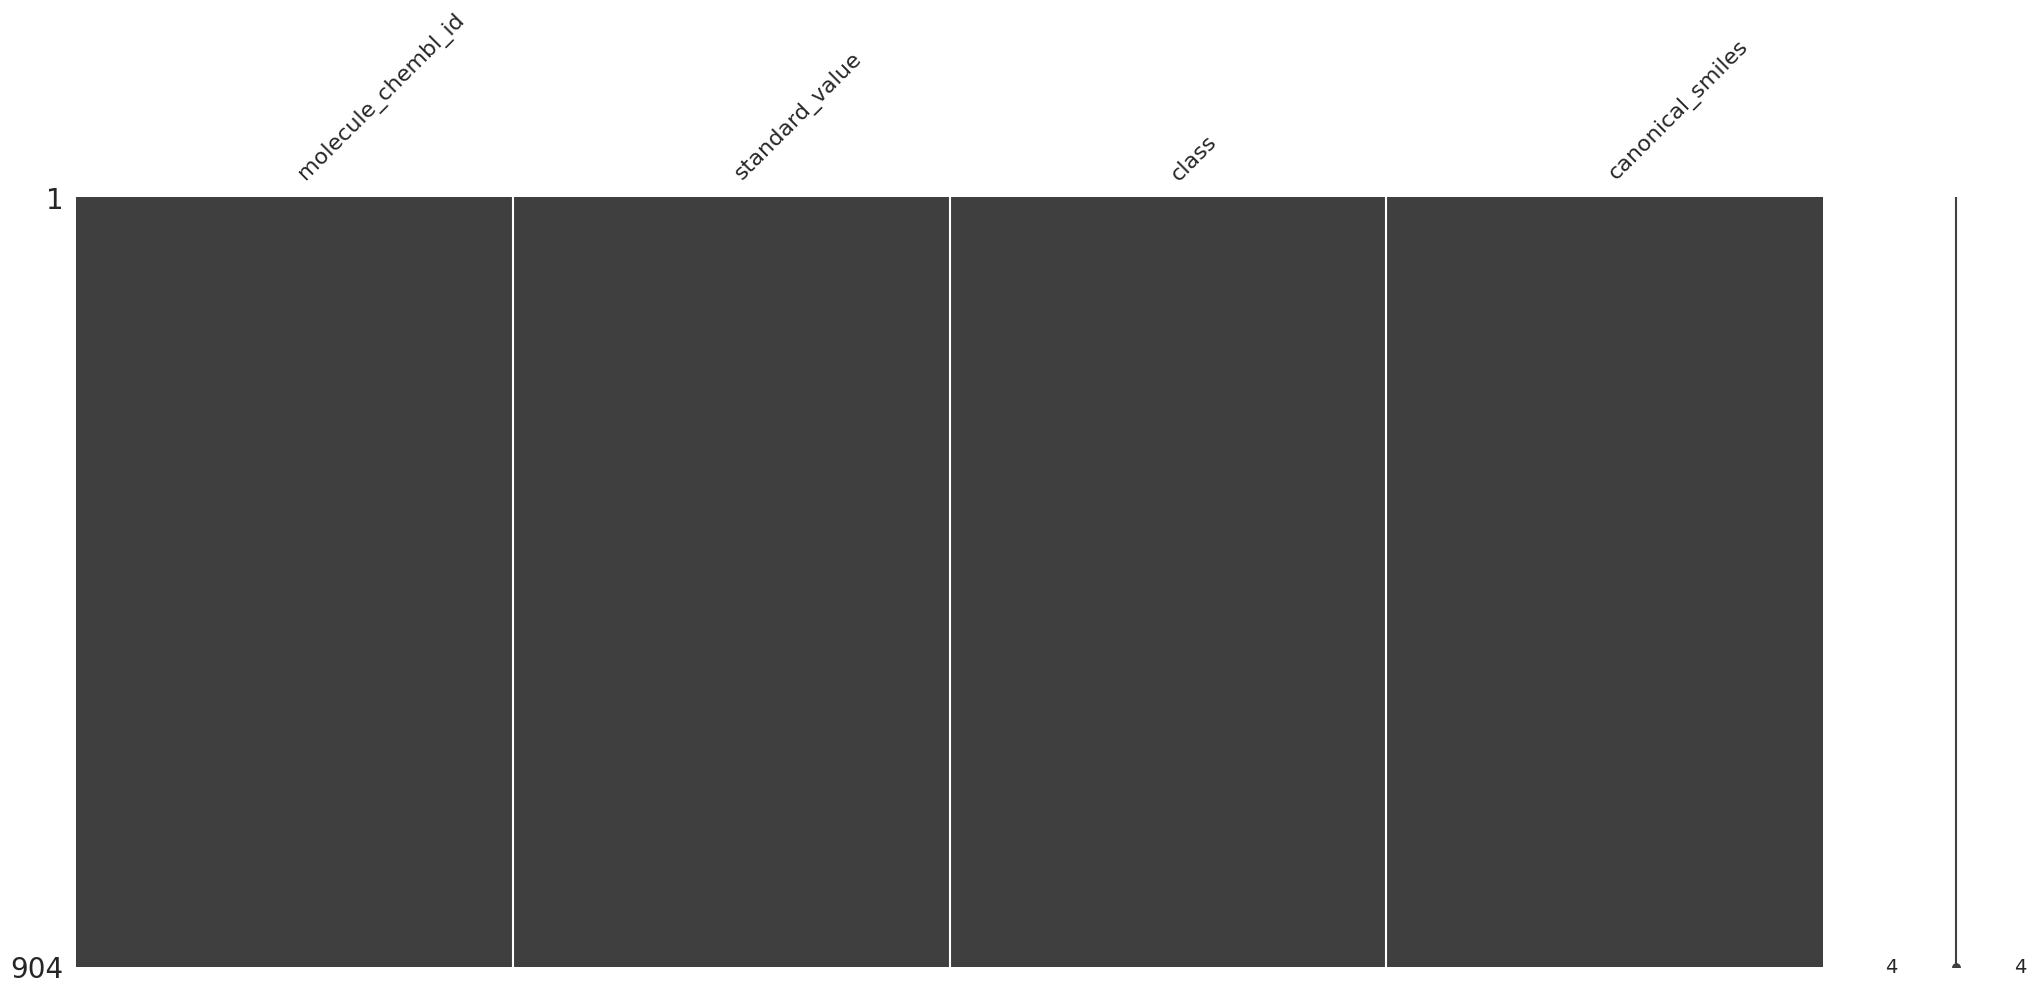

In [ ]:
msno.matrix(df_clean_smiles)

## Menghitung Lipinski Deskriptor

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,464.83,5.55,3.00,4.00
1,448.79,5.46,3.00,5.00
2,448.79,5.46,3.00,5.00
3,482.34,5.83,3.00,5.00
4,430.35,4.69,3.00,6.00
...,...,...,...,...
899,407.87,4.29,4.00,6.00
900,441.42,4.66,4.00,6.00
901,388.44,4.14,2.00,8.00
902,446.56,4.18,1.00,8.00


## Menggabungkan antara dataset dengan deskriptor lipinski

In [ ]:
df_combined = pd.concat([df_clean_smiles,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,standard_value,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1336,2600.00,intermediate,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,464.83,5.55,3.00,4.00
1,CHEMBL2332840,2250.00,intermediate,O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1ccc(Cl)c(C...,448.79,5.46,3.00,5.00
2,CHEMBL2332871,8460.00,intermediate,O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1ccc(C(F)(F...,448.79,5.46,3.00,5.00
3,CHEMBL2332870,5180.00,intermediate,O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1cc(C(F)(F)...,482.34,5.83,3.00,5.00
4,CHEMBL2332869,17760.00,inactive,O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1cccc(OC(F)...,430.35,4.69,3.00,6.00
...,...,...,...,...,...,...,...,...
899,CHEMBL409872,50.00,active,Nc1ncnc2c1N=C(c1ccc(NC(=O)Nc3cccc(Cl)c3)cc1)CCN2,407.87,4.29,4.00,6.00
900,CHEMBL259013,2440.00,intermediate,Nc1ncnc2c1N=C(c1ccc(NC(=O)Nc3ccc(C(F)(F)F)cc3)...,441.42,4.66,4.00,6.00
901,CHEMBL261592,53.00,active,Cc1cc2cc(Nc3ncnn4cc(-c5nnc(C)o5)c(C(C)C)c34)cn...,388.44,4.14,2.00,8.00
902,CHEMBL3545376,0.10,active,COc1cc(OC)cc(N(CCNC(C)C)c2ccc3ncc(-c4cnn(C)c4)...,446.56,4.18,1.00,8.00


<Axes: >

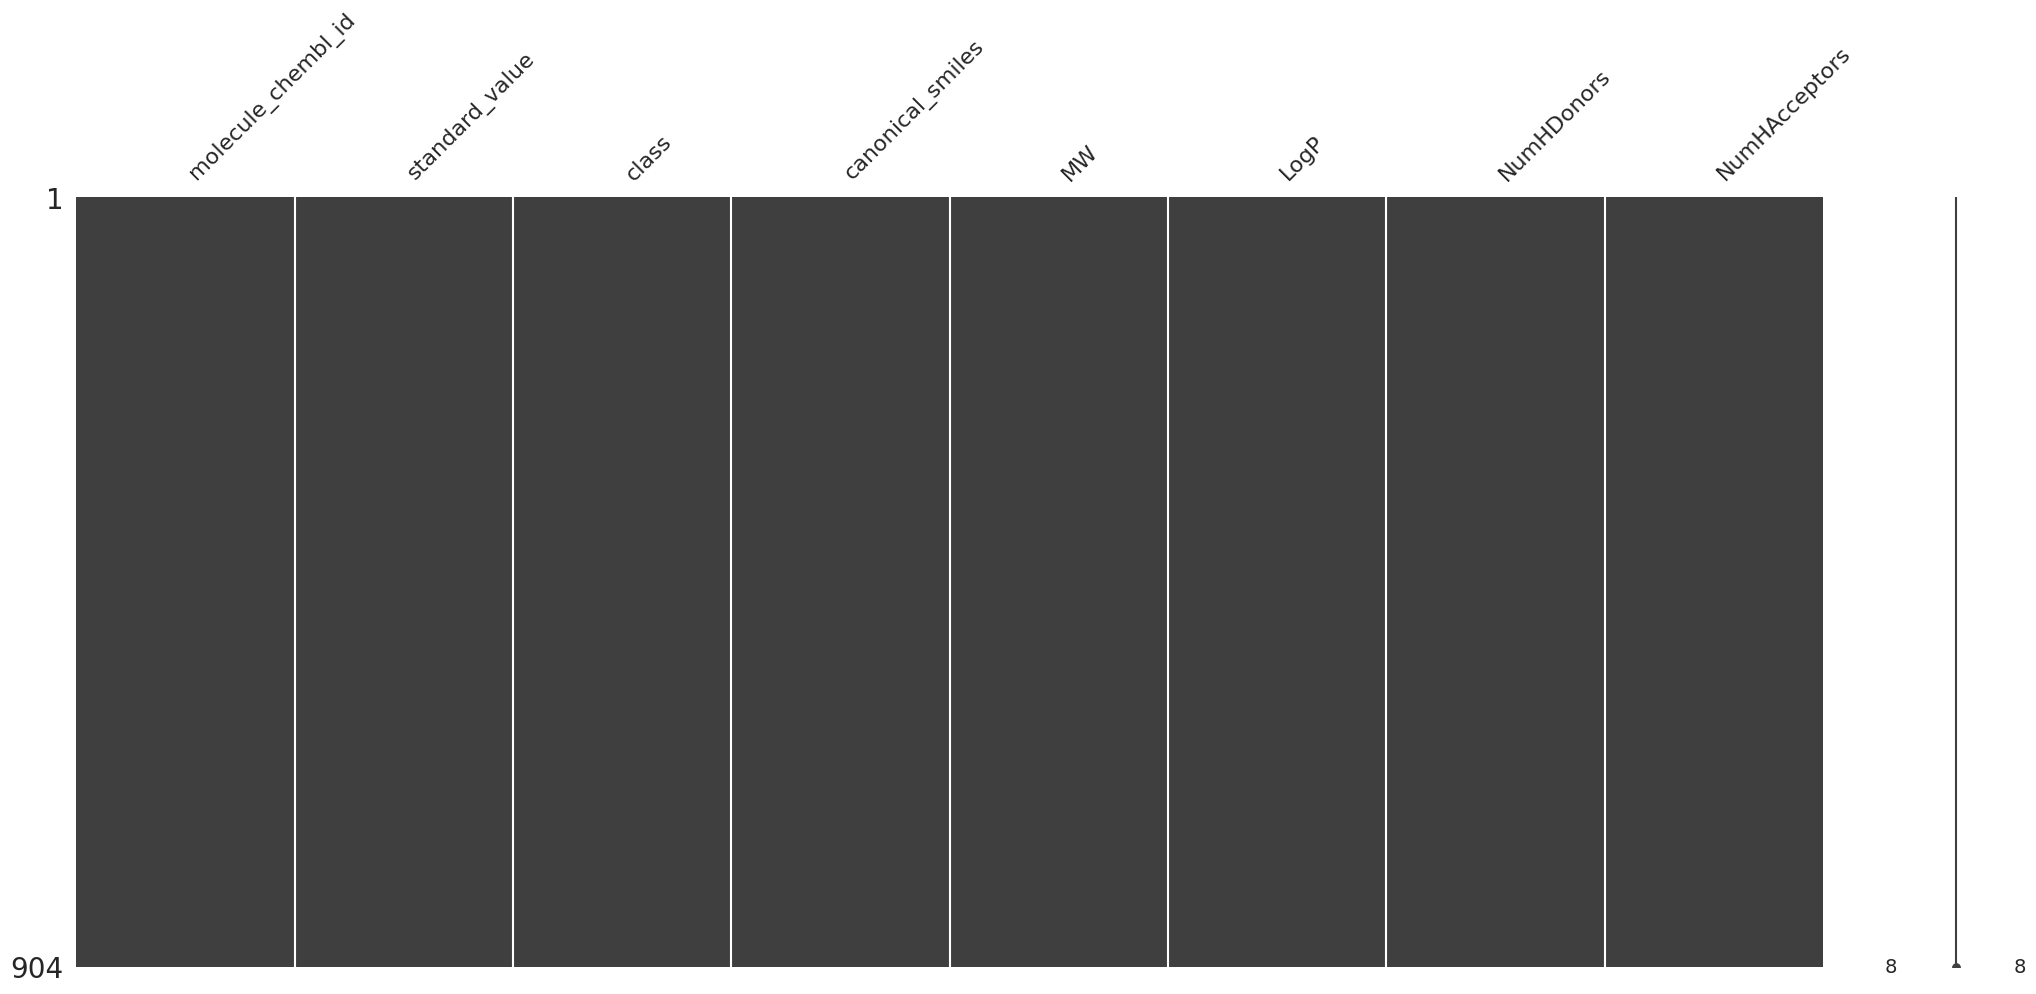

In [ ]:
msno.matrix(df_combined)

## Konversi IC50 menjadi pIC50

In [ ]:
import numpy as np
import pandas as pd

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i * (10 ** -9)  # Konversi nM ke M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)  # Perbaikan: Tambahkan axis=1

    return x

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)  # Perbaikan: Tambahkan axis=1

    return x

In [ ]:
df_norm = norm_value(df_combined)
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1336,intermediate,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,464.83,5.55,3.00,4.00,5.59
1,CHEMBL2332840,intermediate,O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1ccc(Cl)c(C...,448.79,5.46,3.00,5.00,5.65
2,CHEMBL2332871,intermediate,O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1ccc(C(F)(F...,448.79,5.46,3.00,5.00,5.07
3,CHEMBL2332870,intermediate,O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1cc(C(F)(F)...,482.34,5.83,3.00,5.00,5.29
4,CHEMBL2332869,inactive,O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1cccc(OC(F)...,430.35,4.69,3.00,6.00,4.75
...,...,...,...,...,...,...,...,...
899,CHEMBL409872,active,Nc1ncnc2c1N=C(c1ccc(NC(=O)Nc3cccc(Cl)c3)cc1)CCN2,407.87,4.29,4.00,6.00,7.30
900,CHEMBL259013,intermediate,Nc1ncnc2c1N=C(c1ccc(NC(=O)Nc3ccc(C(F)(F)F)cc3)...,441.42,4.66,4.00,6.00,5.61
901,CHEMBL261592,active,Cc1cc2cc(Nc3ncnn4cc(-c5nnc(C)o5)c(C(C)C)c34)cn...,388.44,4.14,2.00,8.00,7.28
902,CHEMBL3545376,active,COc1cc(OC)cc(N(CCNC(C)C)c2ccc3ncc(-c4cnn(C)c4)...,446.56,4.18,1.00,8.00,10.00


## Menghapus kelas 'intermediet class'

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
4,CHEMBL2332869,inactive,O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1cccc(OC(F)...,430.35,4.69,3.00,6.00,4.75
5,CHEMBL2332868,inactive,O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1cccc(F)c1,364.34,3.93,3.00,5.00,4.78
8,CHEMBL2332866,inactive,O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1ccc(N2CCOC...,431.46,3.63,3.00,7.00,4.00
9,CHEMBL2332865,inactive,O=C(Nc1ccc(F)cc1)Nc1ccc(Oc2ncnc3[nH]ncc23)cc1,364.34,3.93,3.00,5.00,4.05
10,CHEMBL2332864,inactive,O=C(NCC1CCCCC1)Nc1ccc(Oc2ncnc3[nH]ncc23)cc1,366.43,3.85,3.00,5.00,4.00
...,...,...,...,...,...,...,...,...
896,CHEMBL412102,active,Nc1ncnc2c1N=C(c1ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F...,475.86,5.31,4.00,6.00,7.31
897,CHEMBL429516,active,Nc1ncnc2c1N=C(c1ccc(NC(=O)Nc3ccc(F)c(C(F)(F)F)...,459.41,4.80,4.00,6.00,6.46
899,CHEMBL409872,active,Nc1ncnc2c1N=C(c1ccc(NC(=O)Nc3cccc(Cl)c3)cc1)CCN2,407.87,4.29,4.00,6.00,7.30
901,CHEMBL261592,active,Cc1cc2cc(Nc3ncnn4cc(-c5nnc(C)o5)c(C(C)C)c34)cn...,388.44,4.14,2.00,8.00,7.28


In [ ]:
df_2class.isna().sum()

,0
molecule_chembl_id,0
class,0
canonical_smiles,0
MW,0
LogP,0
NumHDonors,0
NumHAcceptors,0
pIC50,0


In [ ]:
df_2class.to_csv('01_label2class_sars.csv', index=False)